In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.simplefilter('ignore')

In [5]:
# -----------------------------------
# Завдання 1: Кластеризація даних Iris
# -----------------------------------

# 1. Завантажити датасет Ірис
iris_data = load_iris()
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target

# Вивести перші 5 рядків
print("Перші 5 рядків датасету Iris:")
print(iris_df.head())

Перші 5 рядків датасету Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [6]:
# Метод локтя для визначення оптимальної кількості кластерів
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(iris_df.iloc[:, :-1])  # Використовуємо лише ознаки
    wcss.append(kmeans.inertia_)

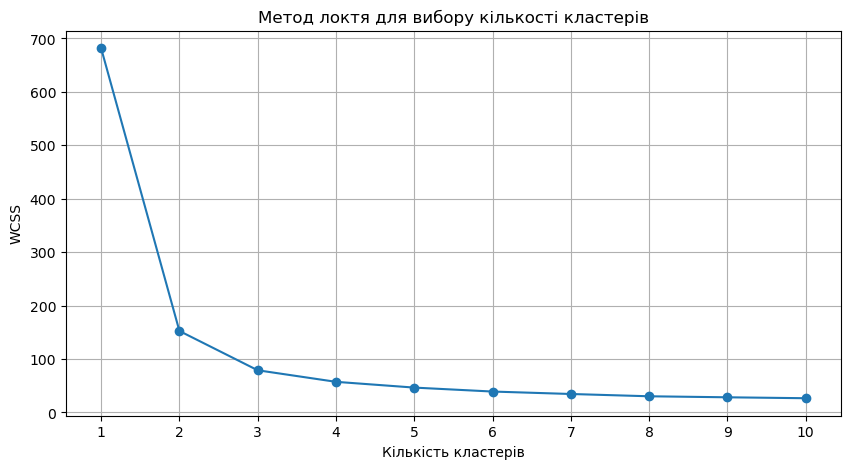

In [7]:
# Візуалізувати метод локтя
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя для вибору кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

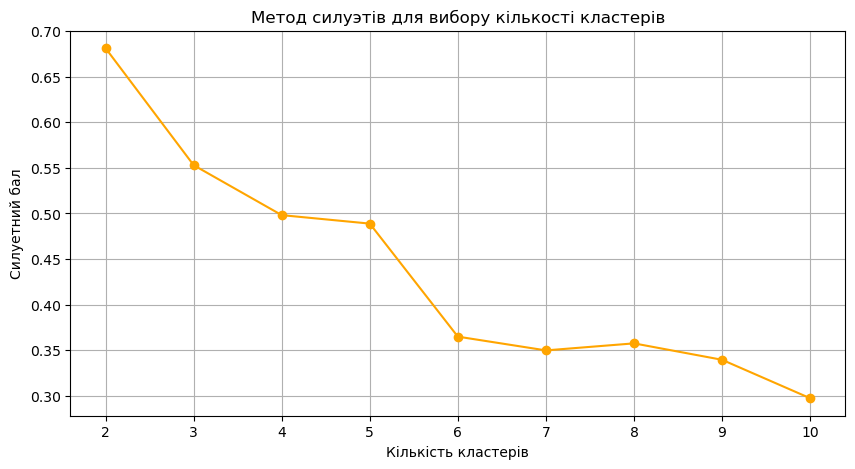

In [8]:
# Метод силуэтів для визначення оптимальної кількості кластерів
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(iris_df.iloc[:, :-1])
    silhouette_scores.append(silhouette_score(iris_df.iloc[:, :-1], kmeans.labels_))

# Візуалізувати метод силуэтів
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Метод силуэтів для вибору кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний бал')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

In [9]:
# Вибір оптимальної кількості кластерів
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Оптимальна кількість кластерів за методом силуэтів: {optimal_clusters}")

# Кластеризація з оптимальною кількістю кластерів
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
iris_df['cluster'] = kmeans_optimal.fit_predict(iris_df.iloc[:, :-1])

Оптимальна кількість кластерів за методом силуэтів: 2


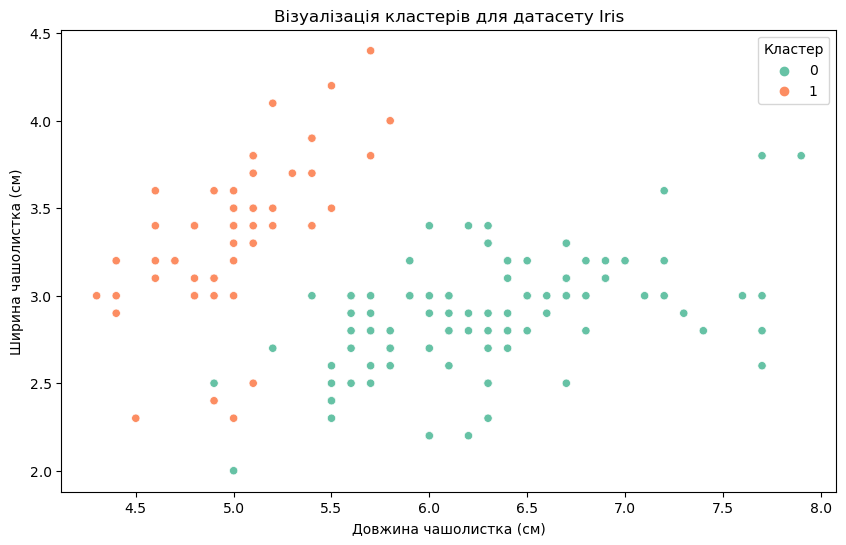


Висновки щодо кластеризації даних Iris:
Оптимальна кількість кластерів: 2


In [10]:
# Візуалізація кластерів
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='cluster', palette='Set2')
plt.title('Візуалізація кластерів для датасету Iris')
plt.xlabel('Довжина чашолистка (см)')
plt.ylabel('Ширина чашолистка (см)')
plt.legend(title='Кластер')
plt.show()

# Висновки
print("\nВисновки щодо кластеризації даних Iris:")
print(f"Оптимальна кількість кластерів: {optimal_clusters}")

In [12]:
# -----------------------------------
# Завдання 2: Кластеризація даних із датасету Student_data.csv# -----------------------------------

# Загрузка датасета Student_data.csv
student_data = pd.read_csv('Student_data.csv')

# Попередній аналіз даних
print("\nПерші 5 рядків датасету Student_data:")
print(student_data.head())
print("\nРозмір датасету:")
print(student_data.shape)
print("\nТипи даних:")
print(student_data.dtypes)


Перші 5 рядків датасету Student_data:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.

In [13]:
# Перевірка на пропущені значення
print("\nПеревірка на пропущені значення:")
print(student_data.isnull().sum())

# Якщо є пропущені значення, замінити на середнє за стовпцем
student_data.fillna(student_data.mean(), inplace=True)


Перевірка на пропущені значення:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [14]:
# Перевірка на дублікати
print("\nПеревірка на дублікати:")
duplicates = student_data.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

# Видалення дублікатів
if duplicates > 0:
    student_data.drop_duplicates(inplace=True)


Перевірка на дублікати:
Кількість дублікатів: 0


In [15]:
# Описова статистика
print("\nОписова статистика:")
print(student_data.describe())


Описова статистика:
         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971   

In [17]:
# Визначення задачі (регресія чи класифікація)
# Наприклад, якщо ми прогнозуємо 'grade', то це регресія
# Визначте цільову змінну
target_column = 'GradeClass'  # Замените на фактическое имя столбца
if target_column in student_data.columns:
    if student_data[target_column].nunique() < 10:  # Проверка на количество классов
        task_type = "класифікація"
    else:
        task_type = "регресія"
else:
    task_type = "невідома"

print(f"\nТип задачі: {task_type}")


Тип задачі: класифікація


In [18]:
# Побудуйте 3 моделі на вибір
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, classification_report

# Розділіть дані на ознаки та цільову змінну
X_student = student_data.drop(columns=[target_column])
y_student = student_data[target_column]

# Розділіть дані на навчальний та тестовий набори
X_train_student, X_test_student, y_train_student, y_test_student = train_test_split(X_student, y_student, test_size=0.2, random_state=42)

In [19]:
# Модель 1: Лінійна регресія
lr_model = LinearRegression()
lr_model.fit(X_train_student, y_train_student)
y_pred_lr = lr_model.predict(X_test_student)
lr_mse = mean_squared_error(y_test_student, y_pred_lr)

In [20]:
# Модель 2: Дерево рішень
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_student, y_train_student)
y_pred_dt = dt_model.predict(X_test_student)
dt_mse = mean_squared_error(y_test_student, y_pred_dt)

In [21]:
# Модель 3: Випадковий ліс
rf_model = RandomForestRegressor()
rf_model.fit(X_train_student, y_train_student)
y_pred_rf = rf_model.predict(X_test_student)
rf_mse = mean_squared_error(y_test_student, y_pred_rf)

In [22]:
# Оцінка моделей
print("\nОцінка моделей:")
print(f"Лінійна регресія MSE: {lr_mse:.4f}")
print(f"Дерево рішень MSE: {dt_mse:.4f}")
print(f"Випадковий ліс MSE: {rf_mse:.4f}")


Оцінка моделей:
Лінійна регресія MSE: 0.5305
Дерево рішень MSE: 0.3820
Випадковий ліс MSE: 0.2241


In [23]:
# Визначення оптимальної кількості кластерів методом локтя та силуэтів
# Використовуємо, наприклад, Random Forest для кластеризації
# Для кластеризації, наприклад, по 'score'
X_student_clustering = student_data.select_dtypes(include=[np.number])  # Вибір числових ознак
wcss_student = []
silhouette_scores_student = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_student_clustering)
    wcss_student.append(kmeans.inertia_)
    if i > 1:  # Для силуэтів необхідно 2 і більше кластерів
        silhouette_scores_student.append(silhouette_score(X_student_clustering, kmeans.labels_))

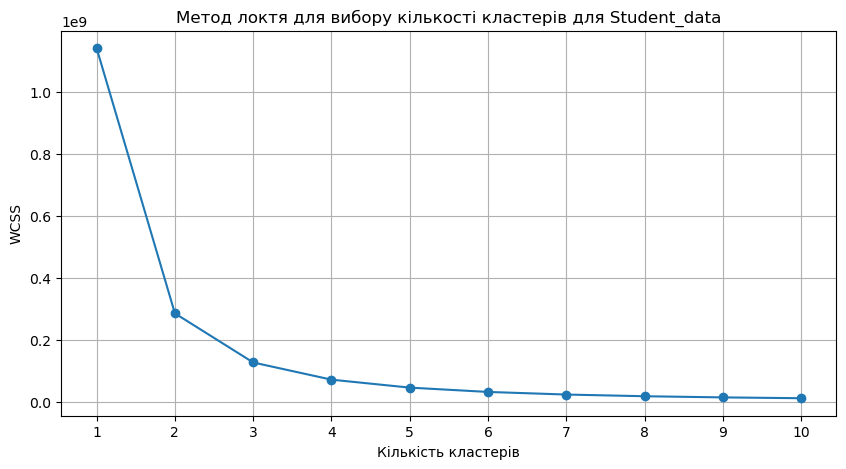

In [24]:
# Візуалізувати метод локтя
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_student, marker='o')
plt.title('Метод локтя для вибору кількості кластерів для Student_data')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

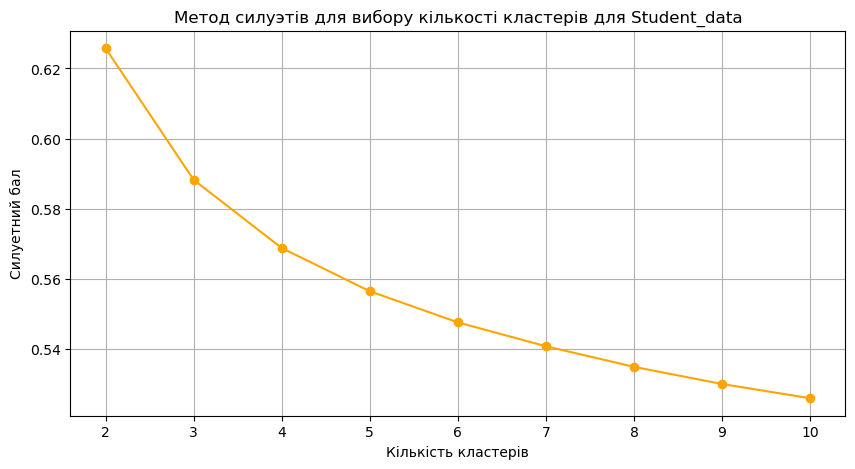

In [25]:
# Візуалізувати метод силуэтів
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores_student, marker='o', color='orange')
plt.title('Метод силуэтів для вибору кількості кластерів для Student_data')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний бал')
plt.xticks(range(2, 11))
plt.grid()
plt.show()